# Importar librerías necesarias

In [ ]:
import pandas as pd
import time
import numpy as np
import string
import re

In [ ]:
#df_train = pd.read_csv('https://raw.githubusercontent.com/david-T-M/Data/main/train.csv')

In [ ]:
df_train = pd.read_csv('/content/brown.csv')

In [ ]:
df_train

,doc_id,filename,Texto,label
0,1,cd05,"Furthermore , as an encouragement to revisioni...",religion
1,2,cd05,The Unitarian clergy were an exclusive club of...,religion
2,3,cd05,"Ezra Stiles Gannett , an honorable representat...",religion
3,4,cd05,"Even so , Gannett judiciously argued , the Ass...",religion
4,5,cd05,We today are not entitled to excoriate honest ...,religion
...,...,...,...,...
1251,1252,cl08,`` A lot of people are so peculiar that they d...,mystery
1252,1253,cl08,And I suppose now that you've finally grown up...,mystery
1253,1254,cl08,"Yes , well , it's a pity to spoil your girlish...",mystery
1254,1255,cl08,I wonder if the Carters would take one .,mystery


# **Modelación de documentos de entrenamiento**


## 1.- Creacion de matriz para SVD :
Corpus de tamaño **N**, y vocabulario **v**

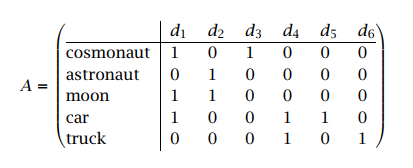

In [ ]:
# with 40 texts = 40 articulos
nd=1256
train = df_train.iloc[0:nd]
list_tokens = [] # lista de palabras totales
big_string = ''
for index,string in train.iterrows():
    big_string += re.sub(r'[.,"\'-?:!;]', '', string['Texto'])+ ' '
    string1 = re.sub(r'[.,"\'-?:!;]', '',string['Texto']).split(' ')
    list_tokens.append(string1)

In [ ]:
train

,doc_id,filename,Texto,label
0,1,cd05,"Furthermore , as an encouragement to revisioni...",religion
1,2,cd05,The Unitarian clergy were an exclusive club of...,religion
2,3,cd05,"Ezra Stiles Gannett , an honorable representat...",religion
3,4,cd05,"Even so , Gannett judiciously argued , the Ass...",religion
4,5,cd05,We today are not entitled to excoriate honest ...,religion
...,...,...,...,...
1251,1252,cl08,`` A lot of people are so peculiar that they d...,mystery
1252,1253,cl08,And I suppose now that you've finally grown up...,mystery
1253,1254,cl08,"Yes , well , it's a pity to spoil your girlish...",mystery
1254,1255,cl08,I wonder if the Carters would take one .,mystery


In [ ]:
#### to evaluate the size of the sample (N tokens, vocabulary v)
string_list = big_string.split(' ')
N = len(string_list) #número de tokens

# Set is used to avoid repetition
set1 = set()
for word in string_list:
    if(word!=''):
      set1.add((word,string_list.count(word)))

ranking_words = pd.DataFrame(set1)
ranking_words.columns = ['word', 'count']
ranking_words = ranking_words.sort_values(['count'], ascending = False)
v = len(ranking_words)
print('Cuantas palabras ?' , N, '\nTamaño del vocabulario ?', v)
ranking_words.tail()

Cuantas palabras ? 28017 
Tamaño del vocabulario ? 5266


,word,count
2188,valuable,1
2189,christianizing,1
2191,poses,1
2192,explain,1
5265,tales,1


In [ ]:
ranking_words = ranking_words.assign(f_documentos=0)

In [ ]:
M = pd.DataFrame(0.0, index=ranking_words['word'], columns=train['doc_id'])

In [ ]:
columnas=M.columns

In [ ]:
temp=M.copy()
temp1=M.copy()
for i in range((temp.shape[1])):
  texto=train.loc[i,'Texto'].split(' ')
  #print(texto)
#  print(texto,i)
  for index, documento in temp1.iterrows():
    #print(index,documento[i],texto.count(index))
    #print(i,index)
    M.at[index,columnas[i]]=texto.count(index)
M

doc_id,1,2,3,4,5,6,7,8,9,10,...,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256
word,,,,,,,,,,,,,,,,,,,,,
the,0.0,2.0,2.0,1.0,1.0,2.0,3.0,2.0,3.0,4.0,...,1.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0
of,0.0,1.0,1.0,0.0,1.0,0.0,3.0,1.0,0.0,3.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
to,4.0,0.0,2.0,1.0,3.0,3.0,2.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0
and,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
a,1.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,...,1.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
valuable,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
christianizing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
poses,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
M.to_pickle("M.pickle")

Calcular el TF-IDF de la matriz Z

In [ ]:
ranking_words.set_index('word',inplace = True)

In [ ]:
M

doc_id,1,2,3,4,5,6,7,8,9,10,...,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256
word,,,,,,,,,,,,,,,,,,,,,
the,0.0,2.0,2.0,1.0,1.0,2.0,3.0,2.0,3.0,4.0,...,1.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0
of,0.0,1.0,1.0,0.0,1.0,0.0,3.0,1.0,0.0,3.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
to,4.0,0.0,2.0,1.0,3.0,3.0,2.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0
and,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
a,1.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,...,1.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
valuable,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
christianizing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
poses,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
temp=M.copy()
for index,articulo in temp.iterrows():
  #print(len(articulo))
  conteo=0.0
  for i in range(1,len(articulo)):
    if(float(articulo[i])>0.0):
      conteo+=1
  ranking_words.at[index,'f_documentos']=conteo
ranking_words

,count,f_documentos
word,,
the,1408,693
of,895,538
to,695,505
and,610,445
a,560,403
...,...,...
valuable,1,1
christianizing,1,1
poses,1,1


In [ ]:
Mzero=M
Mzero

doc_id,1,2,3,4,5,6,7,8,9,10,...,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256
word,,,,,,,,,,,,,,,,,,,,,
the,0.0,2.0,2.0,1.0,1.0,2.0,3.0,2.0,3.0,4.0,...,1.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0
of,0.0,1.0,1.0,0.0,1.0,0.0,3.0,1.0,0.0,3.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
to,4.0,0.0,2.0,1.0,3.0,3.0,2.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0
and,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
a,1.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,...,1.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
valuable,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
christianizing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
poses,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


calculate TF_IDF

In [ ]:
temp=Mzero.copy()

In [ ]:
temp1=Mzero.copy()

In [ ]:
for index,articulo in temp.iterrows():
  for i in range(len(articulo)):
    Mzero.at[index,columnas[i]]=temp1.at[index,columnas[i]]*np.log10((1+nd)/(1+ranking_words.loc[index,'f_documentos']))

In [ ]:
Mzero.to_pickle("MZero.pickle")

In [ ]:
Mzero

doc_id,1,2,3,4,5,6,7,8,9,10,...,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256
word,,,,,,,,,,,,,,,,,,,,,
the,0.000000,0.515952,0.515952,0.257976,0.257976,0.515952,0.773927,0.515952,0.773927,1.031903,...,0.257976,0.257976,0.0,0.0,0.0,0.515952,0.000000,0.257976,0.257976,0.0
of,0.000000,0.367747,0.367747,0.000000,0.367747,0.000000,1.103240,0.367747,0.000000,1.103240,...,0.000000,0.367747,0.0,0.0,0.0,0.367747,0.000000,0.000000,0.000000,0.0
to,1.580739,0.000000,0.790370,0.395185,1.185554,1.185554,0.790370,0.395185,0.000000,0.395185,...,0.000000,0.395185,0.0,0.0,0.0,0.790370,0.000000,0.395185,0.000000,0.0
and,0.000000,0.450000,0.450000,0.000000,0.450000,0.450000,0.000000,0.000000,0.450000,0.900001,...,0.000000,0.450000,0.0,0.0,0.0,0.450000,0.000000,0.000000,0.000000,0.0
a,0.492954,0.492954,0.000000,0.000000,0.000000,0.985908,0.000000,0.492954,0.000000,0.492954,...,0.492954,0.985908,0.0,0.0,0.0,0.000000,0.492954,0.492954,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
valuable,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
christianizing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
poses,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0


## Descomposición de valores singulares

## Primer paso : Aproximación de mínimos cuadrados

La proyección SVD es calculada por descomposición, la matriz de representaciones de documentos. (40 documents, vocabulary of N terms)
$M_{N×40}$ en el producto de tres matrices, $ U_{N×d}, Sigma_{d×d}$, y $(V_{40×d})^{T}$ ,con $d = min(N,40) = 40 $ :  $$M_{N×40} = U_{N×40}.Sigma_{40×40}.(V_{40×N})^{T}$$

- Las matrices U y V representan términos y documentos en este nuevo espacio. Por ejemplo, la primera columna de U corresponde a la primera fila de M, y la primera columna de V corresponde a la primera columna de M.
- La matriz diagonal Sigma contiene los valores singulares de M en orden descendente

In [ ]:
from numpy import array
from scipy.linalg import svd

In [ ]:
? svd # doc of svd()

Object ` svd # doc of svd()` not found.


In [ ]:
U, s, VT = svd(Mzero)
d = min(Mzero.shape[0], Mzero.shape[1])
Sigma = np.zeros((d,d))
Sigma[:Mzero.shape[0], :Mzero.shape[0]] = np.diag(s)

In [ ]:
print('\nU :\n', U.round(2))
print('\nSigma :\n',Sigma.round(2))
print('\nVT :\n',VT.round(2))


U :
 [[ 0.28  0.01  0.01 ...  0.    0.   -0.01]
 [ 0.27  0.14  0.08 ... -0.01  0.   -0.  ]
 [ 0.2  -0.01 -0.08 ...  0.01 -0.01 -0.  ]
 ...
 [ 0.    0.   -0.   ...  0.9   0.   -0.  ]
 [ 0.    0.01  0.01 ...  0.    0.85  0.01]
 [ 0.    0.   -0.   ...  0.    0.01  0.9 ]]

Sigma :
 [[47.79  0.    0.   ...  0.    0.    0.  ]
 [ 0.   27.09  0.   ...  0.    0.    0.  ]
 [ 0.    0.   24.3  ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]]

VT :
 [[ 0.03  0.04  0.05 ...  0.04  0.01  0.02]
 [ 0.01  0.    0.   ... -0.   -0.   -0.03]
 [-0.02 -0.02 -0.02 ... -0.04 -0.01  0.  ]
 ...
 [ 0.   -0.    0.   ... -0.   -0.    0.  ]
 [ 0.    0.   -0.   ...  0.    0.    0.  ]
 [ 0.    0.   -0.   ...  0.   -0.    0.  ]]


## Segundo paso : restringir el número de dimensiones

Restringiendo las matrices U, Sigma y VT a sus primeras k < n filas se obtienen las matrices $ U_{N×k}, Sigma_{k×k}$, y $VT_{k×40}$

#SVD usado para reducir dimensionalidad

**FIGURE 2** : La matriz de documentos despues de rescalar y reducir a dos dimensiones.

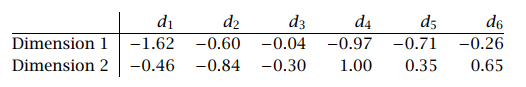

In [ ]:
# seleccionar el número de documentos
n_elements = 2
Sigma = Sigma[:n_elements, :n_elements]
VT = VT[:n_elements, :]
U = U[:, :n_elements]
# by the way, we can also reconstruct A
Mreconstructed = U.dot(Sigma.dot(VT))
print('M :\n', Mreconstructed.round(3))

M :
 [[ 0.387  0.528  0.616 ...  0.479  0.118  0.237]
 [ 0.396  0.521  0.607 ...  0.454  0.103  0.136]
 [ 0.269  0.369  0.43  ...  0.337  0.084  0.179]
 ...
 [ 0.005  0.006  0.007 ...  0.005  0.001  0.002]
 [ 0.005  0.005  0.006 ...  0.003  0.    -0.005]
 [ 0.002  0.003  0.003 ...  0.002  0.     0.   ]]


## Tercer paso : reescalando con valores singulares
EL objetivo es obtener la matriz con dimensión redicida $ B = Sigmak_{k×k}.VT_{k×40} $ de documentos, con valores singulares y reducción a dos dimensiones.

In [ ]:
# transform
B = Sigma.dot(VT)[:n_elements,:]
print('\nB = \n', B.round(2))


B = 
 [[ 1.38  1.88  2.19 ...  1.71  0.42  0.87]
 [ 0.16  0.08  0.09 ... -0.07 -0.08 -0.7 ]]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

%matplotlib inline

for k in range(len(B[0])):
  x=B[0][k]
  y=B[1][k]
  B[0][k]= x/np.sqrt((x**2+y**2))
  B[1][k]= y/np.sqrt((x**2+y**2))

x = B[0]
y = B[1]
labels = np.arange(0,len(x))

fig = px.scatter(x=x, y=y, text=labels)
fig.update_traces(textposition='top center')
fig.show()


<ipython-input-182-a3304ed80af4>:10: RuntimeWarning:

invalid value encountered in double_scalars

<ipython-input-182-a3304ed80af4>:11: RuntimeWarning:

invalid value encountered in double_scalars



In [ ]:
train.at[7,'Texto']

"Their demand against the Calvinist Orthodoxy for intellectual liberty had never meant that they would follow `` free inquiry '' to the extreme of proclaiming Christianity a `` natural '' religion ."

In [ ]:
train.at[17,'Texto']

'It was indeed a near thing , but somehow the inherent decency of New England ( which we inherit ) did triumph .'

#PCA (Principal Component Analysis)

In [ ]:
from sklearn import decomposition

In [ ]:
pca=decomposition.PCA(n_components=40)
pc=pca.fit_transform(Mzero)

In [ ]:
df=pd.DataFrame({'var':pca.explained_variance_ratio_})

<Axes: ylabel='var'>

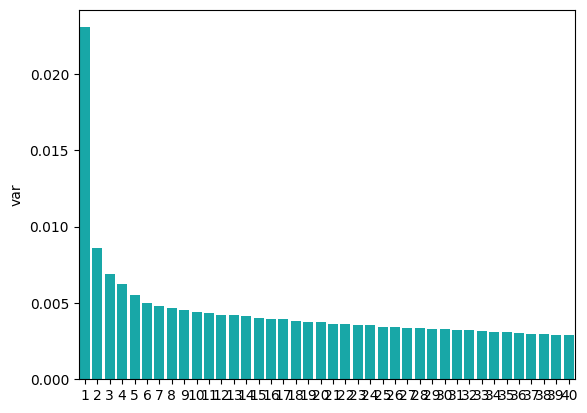

In [ ]:
import seaborn as sns
sns.barplot(x=list(range(1,40+1)),y='var',data=df,color='c')

In [ ]:
pc

array([[ 1.30873683e+01,  1.31902968e-01,  9.12921975e-02, ...,
        -1.01496297e+00,  6.81517055e-01,  1.78716330e-01],
       [ 1.27265980e+01,  3.71858191e+00,  1.94900532e+00, ...,
         7.06907714e-01, -1.15201962e+00, -8.33712144e-01],
       [ 9.13690244e+00, -3.92579974e-01, -1.89147726e+00, ...,
        -1.07211120e+00, -5.95845491e-01, -8.91718941e-01],
       ...,
       [-8.58182717e-02,  4.05431355e-02, -1.33581521e-02, ...,
         6.24388218e-02, -4.40193273e-02, -6.76749950e-02],
       [-1.25790725e-01,  2.72177619e-01,  1.37800058e-01, ...,
        -9.57088844e-03, -2.80252464e-02,  2.88723824e-02],
       [-1.77200594e-01,  5.57659497e-02, -1.27139443e-02, ...,
        -2.82699705e-02,  3.55864944e-02, -6.01497045e-03]])

In [ ]:
%matplotlib inline

for k in range(len(pc[0])):
  x=pc[0][k]
  y=pc[1][k]
  pc[0][k]= x/np.sqrt((x**2+y**2))
  pc[1][k]= y/np.sqrt((x**2+y**2))

x = pc[0]
y = pc[1]
labels = np.arange(0,len(x))

fig = px.scatter(x=x, y=y, text=labels)
fig.update_traces(textposition='top center')
fig.show()

In [ ]:
train.at[26,'Texto']

'Parker insisted upon not resigning , even when the majority wanted him to depart , upon daring the Fellowship to throw him out .'

In [ ]:
train.at[26,'label']

'religion'

In [ ]:
t1=set(train.at[26,'Texto'].split())

In [ ]:
train.at[16,'Texto']

'All this near tragedy , which to us borders on comedy , enables us to tell the story over and over again , always warming ourselves with a glow of complacency .'

In [ ]:
train.at[16,'label']

'religion'

In [ ]:
t2=set(train.at[16,'Texto'].split())

In [ ]:
t1.intersection(t2)

{',', '.', 'the', 'to'}